## Yelp Sentiment Analysis of Reviews

**Name: Denilson Wilson Aguilar Molina**

**Date: 04/23/2024**

### The question I want to answer with this yelp sentiment analysis of reviews file is to review discover the overall sentiment of reviews for reasturants in Jersey City, I started with using the starting yelp fusion script my professor provided, after that I went ahead and made my own changes to according to the readme.file. I choose too answer this question to get a total of 60 required reviews for this project.

#### Accessing JSON data through an API - (must be kept for anyone who wishes to do the same)
##### Yelp Fusion API
1. Obtain a Yelp Fusion Developer Account here: https://fusion.yelp.com/ Use your student email and access your email to verify your account.
2. Create a Yelp Fusion App.  Login to your Yelp developer account, and select Manage App under General.  Enter an App Name (such as Review Sentiments), your email and a description. 
3. Save your client id and api key in a separate (private) .py file.  This script assumes that this information is saved in yelpkeys.py with the variables client_id and api_key respectively.
4. Import your id and key into your notebook by importing the file containing this private information.


In [3]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob
from wordcloud import WordCloud
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [4]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

#### I've made a changes to the provided code to search for restaurants in Jersey City specifcally.

In [12]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/biz/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'Fast Food'
DEFAULT_LOCATION = 'Jersey City, NJ'
SEARCH_LIMIT = 20 #3 per business limit


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [13]:
response = search(API_KEY,DEFAULT_TERM, 'Jersey City, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [14]:
response

{'businesses': [{'id': 'ASv7oMa0_jsbvAwR5Szkzw',
   'alias': 'nicks-restaurant-jersey-city-2',
   'name': "Nick's Restaurant",
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/2S5iOYm91T3iye4Rrf55nQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/nicks-restaurant-jersey-city-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 21,
   'categories': [{'alias': 'cafes', 'title': 'Cafes'},
    {'alias': 'diners', 'title': 'Diners'}],
   'rating': 4.7,
   'coordinates': {'latitude': 40.7130470275879,
    'longitude': -74.064208984375},
   'transactions': ['pickup'],
   'price': '$',
   'location': {'address1': '402 Communipaw Ave',
    'address2': '',
    'address3': '',
    'city': 'Jersey City',
    'zip_code': '07304',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['402 Communipaw Ave', 'Jersey City, NJ 07304']},
   'phone': '+12014349538',
   

#### I was given 20 business for this analysis and 3 reviews from each of them for a total of 60 reviews, they are Nick's Restaurant, La Brujeria, The House of Hot Chicken, El Ranchero Taqueria, No Forks Given, Korai Kitchen, etc. now that I've gathered theses buinsess I will use the default Textblob analyzer to determine whether the reviews are positive, negative, or neutral. I will have this split in two parts, first part will contain the Textblob sentiment analysis and second part will contain a pie chart of these reviews.

In [22]:
# Sentiment counters
positive_count = 0
negative_count = 0
neutral_count = 0

for business in response['businesses']:
    print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
            positive_count += 1
        elif sentiment < 0:
            print('    Sentiment: Negative')
            negative_count += 1
        else:
            print('    Sentiment: Neutral')
            neutral_count += 1
        print('\n================\n\n\n')

{'businesses': [{'id': 'ASv7oMa0_jsbvAwR5Szkzw', 'alias': 'nicks-restaurant-jersey-city-2', 'name': "Nick's Restaurant", 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/2S5iOYm91T3iye4Rrf55nQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/nicks-restaurant-jersey-city-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 21, 'categories': [{'alias': 'cafes', 'title': 'Cafes'}, {'alias': 'diners', 'title': 'Diners'}], 'rating': 4.7, 'coordinates': {'latitude': 40.7130470275879, 'longitude': -74.064208984375}, 'transactions': ['pickup'], 'price': '$', 'location': {'address1': '402 Communipaw Ave', 'address2': '', 'address3': '', 'city': 'Jersey City', 'zip_code': '07304', 'country': 'US', 'state': 'NJ', 'display_address': ['402 Communipaw Ave', 'Jersey City, NJ 07304']}, 'phone': '+12014349538', 'display_phone': '(201) 434-9538', 'distance': 1540.0512612164453}, {'id': '22

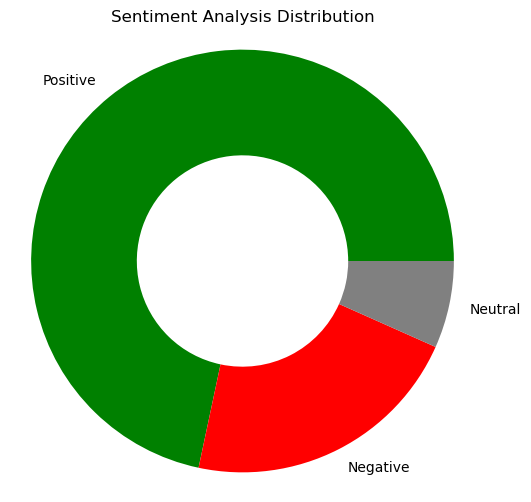

In [33]:
# I'm defining the info/data here
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]

# This creates the donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'gray'])
ax.set_title('Sentiment Analysis Distribution')

# This pretty much is used to make sure that the pie chart is a circle
ax.axis('equal')
plt.show()

#### It appears that the majority of the sentiments were positive, there are many negative ones and a few neuatral ones too. Overall it appears that the restaurants in Jersey City are seen in more of a positive light, there not as many neutral reviews and there does appear to be quite a few negative reviews too. 

#### Now I will use NaiveBayesAnalyzer to determine whether the reviews are positive, negative, or neutral. It wil be structured in the same was as I structed the TextBlob Analyzer, being split into 2 parts, first part containing the analysis from NaiveBayesAnalyzer and the second part containg a pie chart.

In [34]:
# sentiment counter, used for pie chart
positive_count = 0
negative_count = 0
neutral_count = 0

for business in response['businesses']:
    print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'], analyzer=NaiveBayesAnalyzer())
        sentiment = blob.sentiment
        if sentiment.classification == 'pos':
            print('    Sentiment: Positive')
            positive_count += 1
        elif sentiment.classification == 'neg':
            print('    Sentiment: Negative')
            negative_count += 1
        else:
            print('    Sentiment: Neutral')
            neutral_count += 1
        print('\n================\n\n\n')

{'businesses': [{'id': 'ASv7oMa0_jsbvAwR5Szkzw', 'alias': 'nicks-restaurant-jersey-city-2', 'name': "Nick's Restaurant", 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/2S5iOYm91T3iye4Rrf55nQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/nicks-restaurant-jersey-city-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 21, 'categories': [{'alias': 'cafes', 'title': 'Cafes'}, {'alias': 'diners', 'title': 'Diners'}], 'rating': 4.7, 'coordinates': {'latitude': 40.7130470275879, 'longitude': -74.064208984375}, 'transactions': ['pickup'], 'price': '$', 'location': {'address1': '402 Communipaw Ave', 'address2': '', 'address3': '', 'city': 'Jersey City', 'zip_code': '07304', 'country': 'US', 'state': 'NJ', 'display_address': ['402 Communipaw Ave', 'Jersey City, NJ 07304']}, 'phone': '+12014349538', 'display_phone': '(201) 434-9538', 'distance': 1540.0512612164453}, {'id': '22

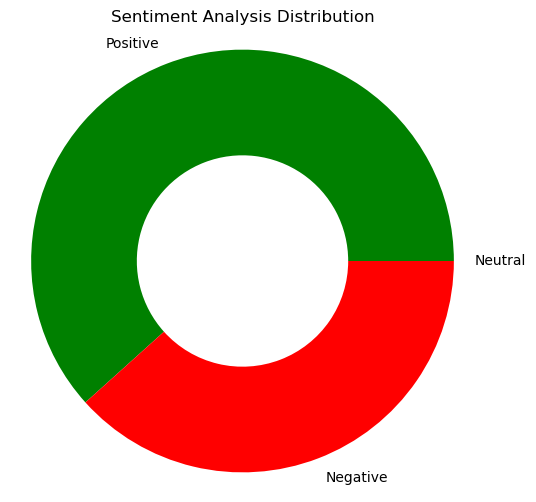

In [35]:
# I'm defining the info/data here
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]

# This creates the donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'gray'])
ax.set_title('Sentiment Analysis Distribution')

# This pretty much is used to make sure that the pie chart is a circle
ax.axis('equal')
plt.show()

#### It appears that the NaiveBayesAnalyzer determined there are no neutral reviews and more negative reviews compared to the TextBlob analyzer, It's appears to be arond 40 % negative reviews. But upon closer inspection it can be seen that the NaiveBayesAnalyzer is wrong. For example the NaiveBayerAnalyzer determined that the review comment "everything was fireeee!" was negative while the TextBlob analyzer determined it was positive, which would fit in with how people would interpret it. It can be seen that the default TextBlob analyzer is more on the accurate side for analyzing reviews, the NaiveBayesAnalyzer doesn't appear to be as accurate.


In [68]:
import requests

# Replace 'YOUR_API_KEY' with your actual Yelp API key
api_key = APIKEY

# Replace 'BUSINESS_ID' with the actual Yelp business ID
business_id = '22QsJuEb7zBqy6J8xDe8gw'

url = f'https://api.yelp.com/v3/businesses/{business_id}/reviews'

headers = {
    'Authorization': f'Bearer {api_key}',
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    reviews = data.get('reviews', [])
    for review in reviews:
        print(review['text'])
else:
    print(f"Error: {response.status_code}, {response.text}")


Always order delivery from here with DoorDash, fantastic lamb birria tacos all I've ever gotten there cuz I can't bring myself to order anything else just...
Fresh and flavorable Tinga. We had sopes and a quesadilla. Guacamole was chunky and just the right amount of flavor. 
Service was friendly and bar setting...
My heart is broken. This is my favorite takeout place, sometimes embarrassingly so to the point where I'd eat it 3x week when life was particularly...
